# Итоговый проект по специализации "Data Analyst".

## студент: Мамбетова Дана

Анализ событий на сайте «СберАвтоподписка» (сервис долгосрочной аренды автомобилей для физических лиц).

### Цель:
- разобраться в данных (некоторых событий), поступающих с веб-сайта "СберАвтоподписка";
- предоставить данные, которые помогут ответить на ряд вопросов заданных продуктовой командой в отношении поведения пользователей на веб-сайте.

### Задачи:
- Ознакомиться с предоставленными датасетами.

- Провести разведочный анализ данных по датасетам (EDA).

- Объединить датасеты.

- Построить графики визуализации.

- Найти основные корреляций и составить выводы по ним.

- Провести проверку ряда гипотез:

    > Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
    
    > Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые       события.
    
    > Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения       CR (Conversion Rate) в целевые события.
    
- Ответить на вопросы продуктовой команды.

    > Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
    
    > Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
    
    > Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

### Описание датасета

Описание атрибутов *GA Sessions*:
- session_id — ID визита;
- client_id — ID посетителя;
- visit_date — дата визита;
- visit_time — время визита;
- visit_number — порядковый номер визита клиента;
- utm_source — канал привлечения;
- utm_medium — тип привлечения;
- utm_campaign — рекламная кампания;
- utm_keyword — ключевое слово;
- device_category — тип устройства;
- device_os — ОС устройства;
- device_brand — марка устройства;
- device_model — модель устройства;
- device_screen_resolution — разрешение экрана;
-  evice_bran — марка устройства;
- evice_moel — модель устройства;
- evice_screen_resolution — разрешение экрана;
- evice_browser — браузер;
- geo_country — страна;
- geo_city — город

Описание атрибутов *GA Hits*:
- session_i — ID визита;
- hit_date — дата события;
- hit_time — время события;
- hit_number — порядковый номер события в рамках сессии;
- hit_type — тип события;
- hit_referer — источник события;
- hit_page_path — страница события;
- event_category — тип действия;
- event_action — действие;
- event_label — тег действия;
- event_value — значение результата действия

## 1. Импортируем необходимые пакеты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats

%matplotlib inline
sns.set();

## 2. Считываем данные в dataframe

In [2]:
df_session=pd.read_csv('data/ga_sessions.csv', encoding='utf-8', header=0)
df_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5438213460695303401.1635634964.1635634964,1266182740.163563,2021-10-31,02:02:44,2.0,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Macintosh,NaN,NaN,1680x1050,Chrome,Russia,Moscow
1048571,5438217184425358185.1629041513.1629041513,1266183607.162904,2021-08-15,18:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,DsqwamlMwRgMTyspCjFR,NaN,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Moscow
1048572,5438222011977255214.1637697841.1637697841,1266184731.163769,2021-11-23,23:04:01,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,fzbotReoFzSuckjwcpCs,mobile,Android,Xiaomi,NaN,851x393,Chrome,Russia,Moscow
1048573,5438224043496260994.1637172612.1637172665,1266185204.163717,2021-11-17,21:11:05,1.0,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,dlwYatgsQMvLsNApVgcw,HwAaYWqVHOvKPlrcQMnj,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Krasnodar


Таблица включает в себя информацию о посещении сайта «СберАвтоподписка» потенциальными клиентами: дату, время, колличество посещений, канал привлечения и тип привлечения, какое истройство было использовано для входа, локация и прочее.Такие данные дают некоторые описательные характеристики посетителя, и не включает в себя информацию о самих действиях совершаемых непосредственно на  сайте «СберАвтоподписка».

In [3]:
df_hit=pd.read_csv('data/ga_hits.csv', encoding='utf-8', header=0)
df_hit

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


Таблица включает в себя информацию о самих действиях совершаемых на  сайте «СберАвтоподписка» потенциальными клиентами: просмотр страниц с варианатми автомобиля, создание личного кабинета, заказ звонка, составления заявки, подписка на рассылку, ознакомление с догововром и прочее. Создает картину интересов посетителя и спроса на товар(авто).

## 3. EDA: Data Cleaning, Data Engineering, Data visualization.

### 3.1. Dataframe "df_session"

#### Data Cleaning

In [4]:
# Проверить на дублирующие строки
df_session.duplicated().unique().tolist()

[False]

Дублирующие строки в датафрейме отсутствуют.

In [5]:
# Выводим информацию о датасете.
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   session_id                1048575 non-null  object 
 1   client_id                 1048574 non-null  object 
 2   visit_date                1048574 non-null  object 
 3   visit_time                1048574 non-null  object 
 4   visit_number              1048574 non-null  float64
 5   utm_source                1048541 non-null  object 
 6   utm_medium                1048574 non-null  object 
 7   utm_campaign              925353 non-null   object 
 8   utm_adcontent             859667 non-null   object 
 9   utm_keyword               438900 non-null   object 
 10  device_category           1048574 non-null  object 
 11  device_os                 445722 non-null   object 
 12  device_brand              841748 non-null   object 
 13  device_model              9

In [6]:
# Удаляем ненужные/лишние атрибуты, которые не понадобятся для дальнейшего анализа

columns_to_drop = [
    'client_id',
    'visit_time',
    'visit_number',
    'utm_adcontent',
    'utm_keyword',
    'device_os',
    'device_brand',
    'device_model',
    'device_screen_resolution',
    'device_browser'
]

df_session.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# Преобразуем visit_date в соответствующий формат дат
df_session['visit_date']=pd.to_datetime(df_session.visit_date, utc=True)

In [8]:
# Вывести количество пропущенных значений (в абсолютном значении)
df_session.isna().sum().sort_values(ascending=False)

utm_campaign       123222
utm_source             34
visit_date              1
utm_medium              1
device_category         1
geo_country             1
geo_city                1
session_id              0
dtype: int64

In [9]:
# Вывести количество пропущенных значений (в % соотношении)
((df_session.isna().sum()/len(df_session))*100).sort_values(ascending=False)

utm_campaign       11.751377
utm_source          0.003242
visit_date          0.000095
utm_medium          0.000095
device_category     0.000095
geo_country         0.000095
geo_city            0.000095
session_id          0.000000
dtype: float64

In [10]:
# Составляем маску датасета по отсутствующему значению в колонке visit_date
df_session[df_session['visit_date'].isna()]

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city
588358,"3384556968165759599.1637341810.1637341810,7880...",NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Так как строка полностью пустая (неинформативна)удаляем данную строку.
df_session.drop(df_session.index[588358], inplace = True)

In [12]:
# Проверяем, что строка удалена
df_session.isna().sum().sort_values(ascending=False)

utm_campaign       123221
utm_source             33
session_id              0
visit_date              0
utm_medium              0
device_category         0
geo_country             0
geo_city                0
dtype: int64

In [13]:
# Сохраним в переменную categorical имена всех категориальных признаков нашего датасета
categorical = df_session.select_dtypes(include = 'object').columns

# Заменяем пропуски модой
for column in categorical:
    df_session[column].fillna(df_session[column].mode()[0], inplace=True)

# Убедимся, что пропущенных значений больше нет
df_session.isna().sum()

session_id         0
visit_date         0
utm_source         0
utm_medium         0
utm_campaign       0
device_category    0
geo_country        0
geo_city           0
dtype: int64

In [14]:
# Выводим информационные данные по очищенному датасету
df_session.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048574 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype              
---  ------           --------------    -----              
 0   session_id       1048574 non-null  object             
 1   visit_date       1048574 non-null  datetime64[ns, UTC]
 2   utm_source       1048574 non-null  object             
 3   utm_medium       1048574 non-null  object             
 4   utm_campaign     1048574 non-null  object             
 5   device_category  1048574 non-null  object             
 6   geo_country      1048574 non-null  object             
 7   geo_city         1048574 non-null  object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 72.0+ MB


In [15]:
# Проверим колличество уникальных значений по колонке session_id (в изначальном датасете было 1048575, далее удалили пустую строку)
df_session.session_id.nunique()

1048574

In [16]:
# Проверим на наличие дублирующих значений по колонке session_id
df_session['session_id'].duplicated().value_counts()

False    1048574
Name: session_id, dtype: int64

Значения по колонке *session_id* являются уникальными, дублирование не выявлено.

#### Data Engineering

In [17]:
# Добавим дополнительные атрибуты(столбцы) - год и месяц визита. В рамках данной таблицы не будем детализирвоать до дня.
df_session['year_visit'] = df_session.visit_date.apply(lambda x: x.year)
df_session['month_visit'] = df_session.visit_date.apply(lambda x: x.month)
df_session

,session_id,visit_date,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,year_visit,month_visit
0,9055434745589932991.1637753792.1637753792,2021-11-24 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,2021,11
1,905544597018549464.1636867290.1636867290,2021-11-14 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,2021,11
2,9055446045651783499.1640648526.1640648526,2021-12-28 00:00:00+00:00,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,2021,12
3,9055447046360770272.1622255328.1622255328,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021,5
4,9055447046360770272.1622255345.1622255345,2021-05-29 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021,5
...,...,...,...,...,...,...,...,...,...,...
1048570,5438213460695303401.1635634964.1635634964,2021-10-31 00:00:00+00:00,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,desktop,Russia,Moscow,2021,10
1048571,5438217184425358185.1629041513.1629041513,2021-08-15 00:00:00+00:00,kjsLglQLzykiRbcDiGcD,cpc,DsqwamlMwRgMTyspCjFR,mobile,Russia,Moscow,2021,8
1048572,5438222011977255214.1637697841.1637697841,2021-11-23 00:00:00+00:00,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,2021,11
1048573,5438224043496260994.1637172612.1637172665,2021-11-17 00:00:00+00:00,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,desktop,Russia,Krasnodar,2021,11


Данный дасет будем использовать для визуализации данных, также данная таблица пойдет с слияние с таблицей df_hit (после ее обработки).

#### Data visualization

In [18]:
# С каких устройств чаще всего заходят пользователи? Построим датафрейм.
stats = df_session.groupby(['device_category'], as_index=False)[['session_id']].count()
stats = stats.rename(columns={'session_id': 'count'})
stats.sort_values(by='count', ascending=False)

,device_category,count
1,mobile,831681
0,desktop,206648
2,tablet,10245


Как мы видим чаще всего люди заходят на сайт через телефон (мобильное приложение СберАвто). На втором месте (в 4 раза реже по сравнению с предыдущим) вход производится посредством ноутбуков, стационарных компьютеров. И замыкает тройку - использование посетителями планшетов (в 80 раз реже чем через мобильное устройство).

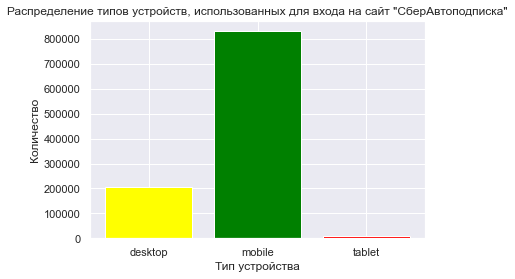

In [19]:
# Дополнительно построим стобчатую диаграмму для датафрейма выше
plt.bar(stats['device_category'], stats['count'], color=['yellow', 'green', 'red'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('Распределение типов устройств, использованных для входа на сайт "СберАвтоподписка"');

In [20]:
# В какой год/месяц самый высокий показатель по визитам на сайт? Построим датафрейм.
stats = df_session.groupby(['year_visit', 'month_visit'], as_index=False)[['session_id']].count()
stats = stats.rename(columns={'session_id': 'count'})
stats.sort_values(by='count', ascending=False)

,year_visit,month_visit,count
7,2021,12,225580
6,2021,11,167800
5,2021,10,158001
4,2021,9,144934
2,2021,7,104724
1,2021,6,93924
3,2021,8,92398
0,2021,5,61213


Компания начала свое существование с 24 мая 2021 года. За 6 дней достаточно приличное колличество визитов, возможно была проведена хорошая рекламная/маркетинговая кампания. Далее из месяца в месяц мы видим расстущие показатели по колличеству входа на сайт, что являются признаком хорошего развития комапнии. Однако, необходимо посмотреть в связке с целевыми действиями (оставили ли заявку? заказли ли звонок?)
Декабрь 2021 имеет максимальное число визитов. 
В августе 2021 идет снижение показателя примерно на 12% ( в сравнении с июлем 2021). Необходима дополнительная информация, также необходим отдельный анализ данного явления. 
Однако с пополнением модельного ряда авто в сент-окт колличество визитов увеличилось в сравнением с показателями того же августа более чем на 55%. 

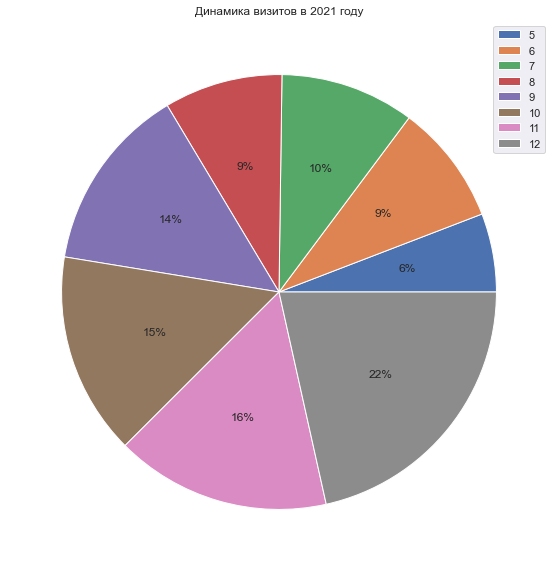

In [21]:
# Дополнительно построим круговую диаграмму
plt.figure(figsize=(15, 10))
plt.pie(stats['count'], labels=stats['month_visit'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Динамика визитов в 2021 году")
plt.legend()
plt.show();

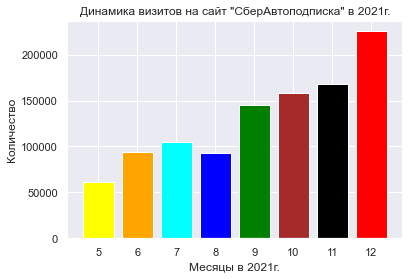

In [22]:
# Дополнительно построим стобчатую диаграмму
plt.bar(stats['month_visit'], stats['count'], color=['yellow', 'orange','cyan', 'blue', 'green', 'brown', 'black', 'red'])
plt.xlabel('Месяцы в 2021г.')
plt.ylabel('Количество')
plt.title('Динамика визитов на сайт "СберАвтоподписка" в 2021г.');

In [23]:
# С каких стран больше всего визитов? Посмотрим первые 10позиций
stats = df_session.groupby(['geo_country'], as_index=False)['session_id'].count()
stats = stats.rename(columns={'session_id': 'count'})
stats = stats.sort_values(by='count', ascending=False).head(10)
stats

,geo_country,count
112,Russia,1015000
146,United States,6586
143,Ukraine,5134
61,Ireland,2283
16,Belarus,2024
131,Sweden,1583
66,Kazakhstan,1297
46,Germany,1213
140,Turkey,1048
92,Netherlands,849


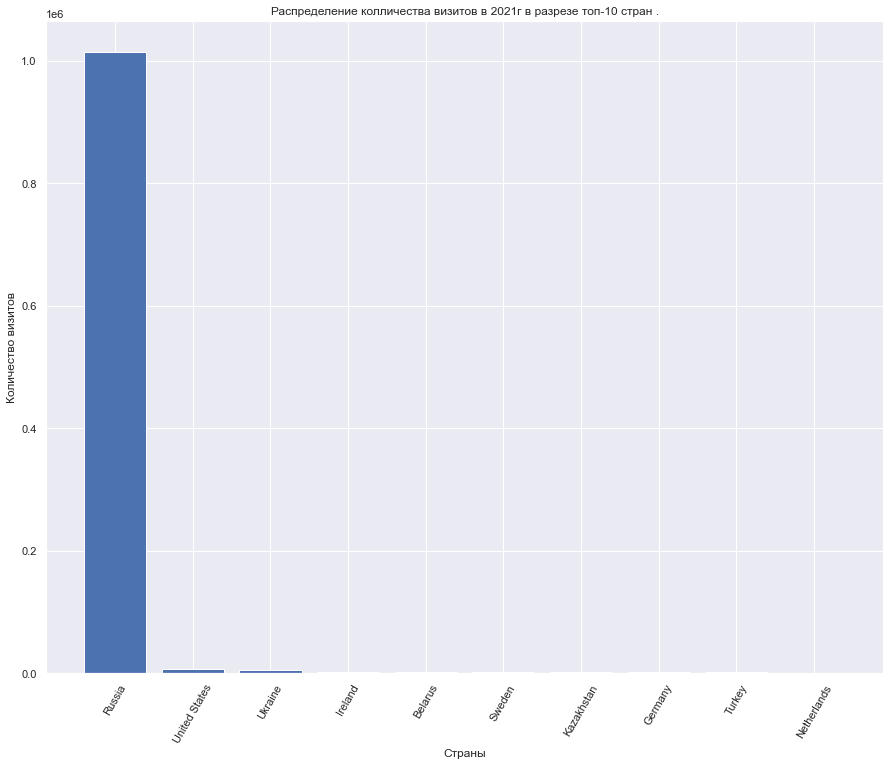

In [24]:
# Дополнительно построим стобчатую диаграмму по первым 10 странам.
plt.figure(figsize=(15, 12))
plt.bar(stats['geo_country'], stats['count'])
plt.xlabel('Страны')
plt.xticks(rotation=60)
plt.ylabel('Количество визитов')
plt.title('Распределение колличества визитов в 2021г в разрезе топ-10 стран .');

При условии, что geo_country показывает с какой точки земного шара происходит вход на сайт (не учитывая vpn и прочие приспособления), то с территории РФ происходит большинство визитов, что является закономерным, так как машины предоставляются в пользовании только на территории РФ и только гражданам РФ.

In [25]:
# В рамках анализа визитов из РФ  проанлизируем ситуацию в разрезе городов? Выведем первые 20 городов с максимальными показателями.
stats = df_session[df_session['geo_country'] == 'Russia'].groupby(['geo_city'], as_index=False)['session_id'].count()
stats = stats.rename(columns={'session_id': 'count'})
stats = stats.sort_values(by='count', ascending=False).head(10)
stats

,geo_city,count
236,Moscow,453172
338,Saint Petersburg,168245
0,(not set),39424
465,Yekaterinburg,20085
177,Krasnodar,18243
137,Kazan,16885
341,Samara,13997
258,Nizhny Novgorod,12503
416,Ufa,12257
274,Novosibirsk,12207


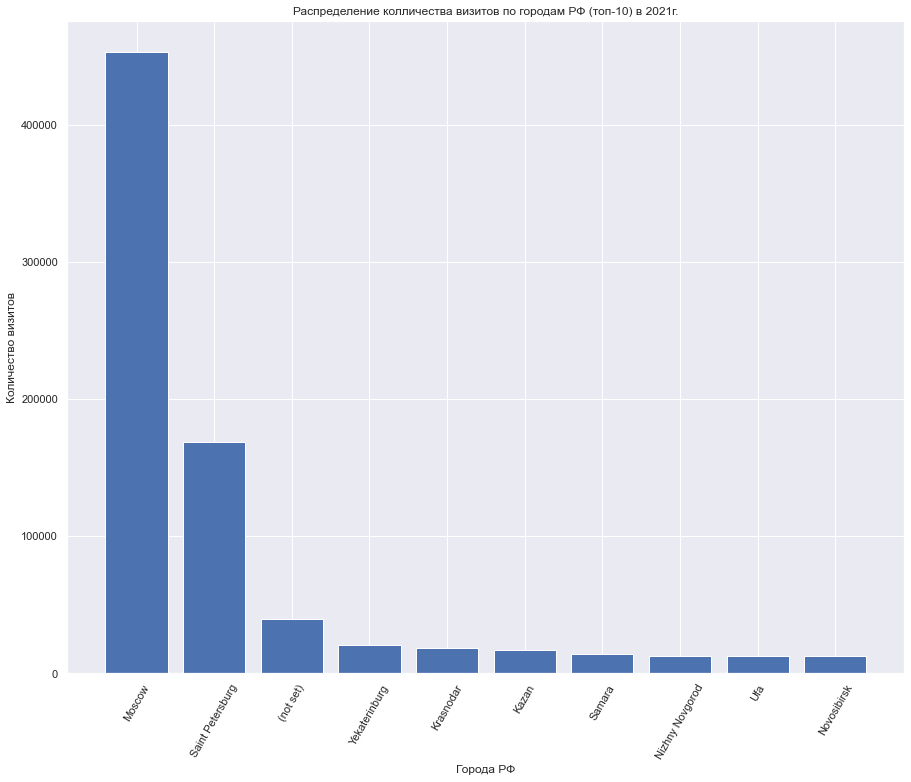

In [26]:
# Дополнительно построим стобчатую диаграмму по первым 20 городам РФ
plt.figure(figsize=(15, 12))
plt.bar(stats['geo_city'], stats['count'])
plt.xlabel('Города РФ')
plt.xticks(rotation=60)
plt.ylabel('Количество визитов')
plt.title('Распределение колличества визитов по городам РФ (топ-10) в 2021г.');

Как и было ожидаемо первые 2 города это - Москва и северная столица страны. Так же можно отметить что около 40 000 записей не отразили месторасположение пользователя.

### 3.2. Dataframe "df_hit"

#### Data Cleaning

In [27]:
# Проверить на дублирующие строки
df_hit[df_hit.duplicated()].shape

(0, 11)

In [28]:
# Выводим информацию о датасете.
df_hit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [29]:
# Удаляем ненужные/лишние атрибуты, которые не понадобятся для дальнейшего анализа
columns_to_drop = [
    'hit_time',
    'hit_number',
    'hit_type',
    'hit_referer',
    'event_category',
    'event_label',
    'event_value'
]

df_hit.drop(columns_to_drop, axis=1, inplace=True)

In [30]:
# Преобразуем visit_date в соответствующий формат дат
df_hit['hit_date']=pd.to_datetime(df_hit.hit_date, utc=True)

In [31]:
# Вывести количество пропущенных значений (в абсолютном значении)
df_hit.isna().sum().sort_values(ascending=False)

session_id       0
hit_date         0
hit_page_path    0
event_action     0
dtype: int64

In [32]:
# Выводим очищенный датасет
df_hit

,session_id,hit_date,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,2021-12-23 00:00:00+00:00,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,2021-12-23 00:00:00+00:00,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show
...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show
15726466,7310304587364460692.1640261783.1640261783,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show
15726467,8013702685784312179.1640270195.1640270195,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show
15726468,8021505554734405918.1640257821.1640257821,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show


In [33]:
df_hit.session_id.nunique()

1734610

In [34]:
# Составляем датасет с целевыми действиями (который далее и будет использован для анализа).
array = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df_hit_target= df_hit[df_hit['event_action'].isin(array)]
df_hit_target

,session_id,hit_date,hit_page_path,event_action
4016,2744563715298057088.1640258436.1640258436,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit_success
4045,3087297479839089634.1640268774.1640268774,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success
4046,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success
4047,3750243879753098158.1640272208.1640272208,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit_success
4048,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit_success
...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_submit_click
15725133,965861352491898977.1636751459.1636751459,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success
15725134,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success
15725135,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_open_dialog_click


In [35]:
# Провери на дублирующие строки по колонке session_id. Имеет место случаи когда пользователи совершали несколько целевых дейвствий.
# В рамках анализа, необходимо считать целевое дейсвие в рамках одного визита.
df_hit_target[df_hit_target['session_id'].duplicated()]

,session_id,hit_date,hit_page_path,event_action
4050,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_submit_success
4519,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_car_claim_submit_click
4535,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_car_request_submit_click
4536,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_car_request_submit_click
7031,154457144547380781.1640271408.1640271408,2021-12-23 00:00:00+00:00,podpiska.sberauto.com/,sub_open_dialog_click
...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_submit_click
15725133,965861352491898977.1636751459.1636751459,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success
15725134,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit_success
15725135,4727705172767122620.1636818847.1636818847,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_open_dialog_click


In [36]:
# Проверим на выборочной основе одно session_id. Как мы видим пользователь под данным номером совершил несколько целевых действий. 
df_hit_target[df_hit_target['session_id'] == '1929569077899335811.1640273714.1640273714']

,session_id,hit_date,hit_page_path,event_action
4049,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_submit_success
4050,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_submit_success
4536,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_car_request_submit_click
1126699,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_car_claim_submit_click
14608035,1929569077899335811.1640273714.1640273714,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/renault/logan/8c3c73f2?r...,sub_car_claim_click


In [37]:
# Удалим дублирующие строки по повторяющимся номерам session_id
df_hit_target.drop_duplicates(subset=['session_id'], keep = 'first', inplace = True)
df_hit_target.head()

,session_id,hit_date,hit_page_path,event_action
4016,2744563715298057088.1640258436.1640258436,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit_success
4045,3087297479839089634.1640268774.1640268774,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success
4046,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success
4047,3750243879753098158.1640272208.1640272208,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit_success
4048,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit_success


#### Feature Engineering

In [38]:
# Создать новые атрибуты - марка автомобиля.
def car_brand(x):
    cars=['kia', 'hyundai', 'lada-vaz', 'renault', 'chery', 'chevrolet',  'nissan', 'volkswagen', 'bmw', 'toyota', 'skoda',
          'acura','alfa-romeo', 'audi', 'byd', 'bentley', 'brilliance', 'cadillac', 'changan', 'chrysler', 'citroen', 'daewoo',
         'daihatsu', 'datsun', 'dodge', 'dongfeng', 'exeed', 'faw', 'fiat', 'ford', 'gac', 'geely', 'genesis', 'great-wall',
         'hafei', 'haima', 'haval', 'hawtai', 'honda', 'hammer', 'infiniti', 'isuzu', 'jac', 'jaguar', 'jeep',
         'lamborghini', 'land-rover', 'lexus', 'lifan', 'lincoln', 'mini', 'maserati', 'mazda', 'mercedes-benz', 'mercury',
          'mitsubishi', 'mitsubishi', 'opel', 'peugeot', 'porsche', 'ram', 'ravon', 'rolls-royce', 'seat', 'saab', 'smart',
         'ssangyong', 'subaru', 'suzuki', 'tesla', 'volvo', 'vortex', 'zotye', 'gaz', 'zaz', 'tagaz', 'uaz']
    
    if not pd.isna(x):
        for car in cars:
            if car in x:
                return car
        else:
            return 'no_car'
    else:
        return x

df_hit_target.loc[:, 'car_brand']=df_hit_target['hit_page_path'].apply(car_brand)


In [39]:
df_hit_target

,session_id,hit_date,hit_page_path,event_action,car_brand
4016,2744563715298057088.1640258436.1640258436,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit_success,kia
4045,3087297479839089634.1640268774.1640268774,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,skoda
4046,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,skoda
4047,3750243879753098158.1640272208.1640272208,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit_success,nissan
4048,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit_success,mercedes-benz
...,...,...,...,...,...
15723721,866859001948841053.1636820407.1636820407,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz
15723722,725494882160817053.1636818259.1636818259,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz
15725017,6722881759963235246.1636811710.1636811710,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz
15725018,1257546673350997498.1636791806.1636791806,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz


In [40]:
# Выведем описатильные статистики по значениям в колонке car_brand
df_hit_target.car_brand.value_counts(dropna=False)

no_car           37156
skoda             3477
lada-vaz          2364
volkswagen        2176
kia               1167
mercedes-benz     1035
toyota             731
renault            614
nissan             613
bmw                437
haval              218
hyundai            151
ram                124
lexus              120
volvo               92
audi                80
porsche             67
peugeot             58
mini                37
land-rover          18
uaz                  6
honda                4
infiniti             3
smart                2
gac                  2
chevrolet            1
fiat                 1
hawtai               1
gaz                  1
alfa-romeo           1
cadillac             1
tesla                1
faw                  1
Name: car_brand, dtype: int64

* "no_car" - заявки не связанные с автомобилями. Например, "заказать обратный звонок" и прочее.

In [41]:
# Добавим дополнительные атрибуты(стобцы) - год и месяц визита.
df_hit_target.loc[:,'year_hit'] = df_hit_target.hit_date.apply(lambda x: x.year)
df_hit_target.loc[:,'month_hit'] = df_hit_target.hit_date.apply(lambda x: x.month)
df_hit_target

,session_id,hit_date,hit_page_path,event_action,car_brand,year_hit,month_hit
4016,2744563715298057088.1640258436.1640258436,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit_success,kia,2021,12
4045,3087297479839089634.1640268774.1640268774,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,skoda,2021,12
4046,3156966333326004302.1640206419.1640206800,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit_success,skoda,2021,12
4047,3750243879753098158.1640272208.1640272208,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit_success,nissan,2021,12
4048,7518333712042258254.1640258901.1640258901,2021-12-23 00:00:00+00:00,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit_success,mercedes-benz,2021,12
...,...,...,...,...,...,...,...
15723721,866859001948841053.1636820407.1636820407,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz,2021,11
15723722,725494882160817053.1636818259.1636818259,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz,2021,11
15725017,6722881759963235246.1636811710.1636811710,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz,2021,11
15725018,1257546673350997498.1636791806.1636791806,2021-11-13 00:00:00+00:00,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_car_claim_click,lada-vaz,2021,11


#### Data visualization

In [42]:
# Самая популярная машина согласно запросу в заявках в 2021г.
stats = df_hit_target[df_hit_target['car_brand'] != 'no_car'].groupby(['car_brand'], as_index=False)['session_id'].count()
stats = stats.rename(columns={'session_id':'count'})
stats.sort_values(by = 'count', ascending=False)

,car_brand,count
25,skoda,3477
15,lada-vaz,2364
30,volkswagen,2176
14,kia,1167
18,mercedes-benz,1035
28,toyota,731
24,renault,614
20,nissan,613
2,bmw,437
9,haval,218


Топ 3 машин - skoda(rapid), lada-vaz(vesta), volkswagen(polo). Наибольшим спросом пользуются машины бюджетного класса, собранные на заводах в РФ. 

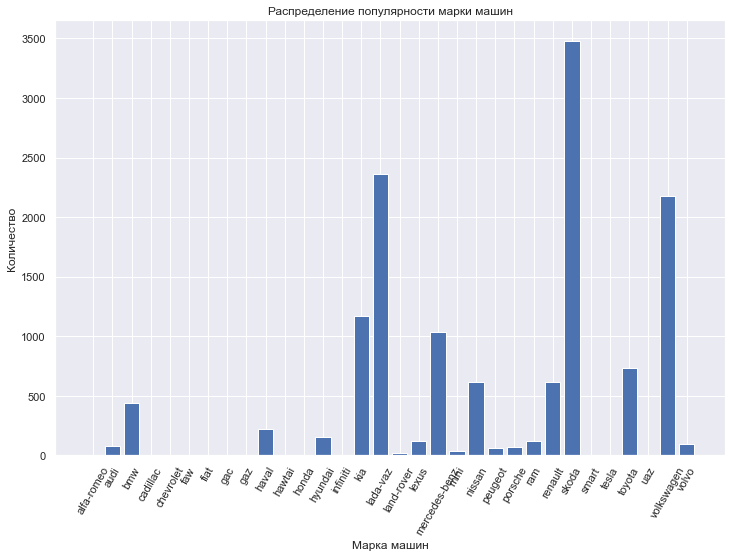

In [43]:
# Построим столбчатую гистограмму расспределения спроса на марки машин в 2021г.
plt.figure(figsize=(12, 8))
plt.bar(stats['car_brand'], stats['count'])
plt.xlabel('Марка машин')
plt.xticks(rotation=60)
plt.ylabel('Количество')
plt.title('Распределение популярности марки машин');

In [44]:
# Самая популярная машина в каждом месяце
stats = df_hit_target[df_hit_target['car_brand'] !='no_car'].groupby(['month_hit'])['car_brand'].agg(pd.Series.mode).to_frame()
stats

,car_brand
month_hit,
6,"[kia, mini]"
7,ram
8,ram
9,ram
10,lada-vaz
11,lada-vaz
12,skoda


In [45]:
# Динамика событий (hit) в 2021 году в разрезе месяцев.
stats = df_hit_target.groupby(['year_hit', 'month_hit'], as_index=False)[['session_id']].count()
stats = stats.rename(columns={'session_id': 'count'})
stats.sort_values(by='count', ascending=False)

,year_hit,month_hit,count
7,2021,12,7476
5,2021,10,7170
1,2021,6,6609
6,2021,11,6604
0,2021,5,6428
4,2021,9,6088
3,2021,8,5498
2,2021,7,4887


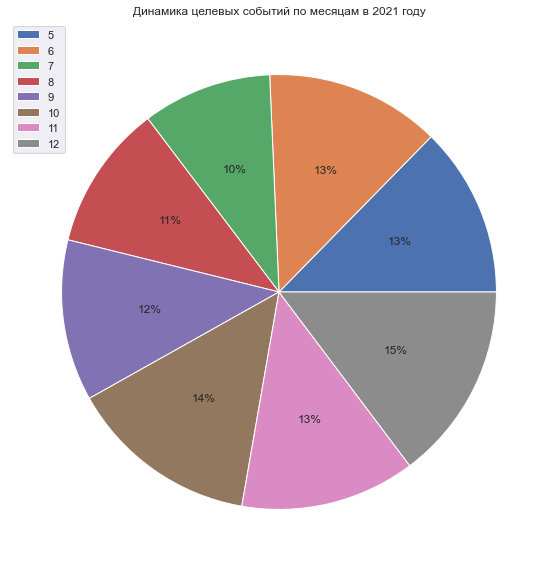

In [46]:
# Дополнительно построим круговую диаграмму
plt.figure(figsize=(15, 10))
plt.pie(stats['count'], labels=stats['month_hit'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Динамика целевых событий по месяцам в 2021 году")
plt.legend()
plt.show();

В декабре 2021 было совершенно больше всего целевых действий.

### 4. Объединение датасетов

In [47]:
# Объединить датасеты df_session и df_hit в одну таблицу по уникальному номеру session_id методом "outer"
df_full = pd.merge(left=df_session, right=df_hit_target, on='session_id', how='outer')
df_full = df_full.drop(columns = ['visit_date','hit_date','hit_page_path'])
df_full

,session_id,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,year_visit,month_visit,event_action,car_brand,year_hit,month_hit
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,2021.0,11.0,NaN,NaN,NaN,NaN
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,2021.0,11.0,NaN,NaN,NaN,NaN
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,2021.0,12.0,NaN,NaN,NaN,NaN
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021.0,5.0,NaN,NaN,NaN,NaN
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021.0,5.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071130,9054912872702758664.1636781836.1636781836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_open_dialog_click,no_car,2021.0,11.0
1071131,720722632329111635.1636797544.1636797544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,skoda,2021.0,11.0
1071132,866859001948841053.1636820407.1636820407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,lada-vaz,2021.0,11.0
1071133,725494882160817053.1636818259.1636818259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,lada-vaz,2021.0,11.0


In [48]:
df_full[df_full['utm_source'].isna()]

,session_id,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,year_visit,month_visit,event_action,car_brand,year_hit,month_hit
1048574,7518333712042258254.1640258901.1640258901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_submit_success,mercedes-benz,2021.0,12.0
1048575,684586169072220257.1640246259.1640246259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_submit_success,nissan,2021.0,12.0
1048576,8005062328276194239.1640207302.1640207302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,haval,2021.0,12.0
1048577,5951201502675905546.1640279052.1640279052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,kia,2021.0,12.0
1048578,7239697979307616353.1640268217.1640268217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,skoda,2021.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071130,9054912872702758664.1636781836.1636781836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_open_dialog_click,no_car,2021.0,11.0
1071131,720722632329111635.1636797544.1636797544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,skoda,2021.0,11.0
1071132,866859001948841053.1636820407.1636820407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,lada-vaz,2021.0,11.0
1071133,725494882160817053.1636818259.1636818259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sub_car_claim_click,lada-vaz,2021.0,11.0


Необходимо отметить, что имеется некоторое колличество целевых действий совершенных без посещения страницы сайта. Например, на сайте сберавто можно сразу перейти в раздер выбора машин по подписке.Таким образом, имеется нижняя часть объединенной таблицы не имеет значений по столбцам session_id, utm_source и т.д.

In [49]:
# Дополнительно для информации составим еще один датасет путем объединения датасетов df_session и df_hit в одну таблицу 
# по уникальному номеру session_id методом "inner"
df_full_inner = pd.merge(left=df_session, right=df_hit_target, on='session_id', how='inner')
df_full_inner = df_full_inner.drop(columns = ['visit_date','hit_date', 'hit_page_path'])
df_full_inner


,session_id,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,year_visit,month_visit,event_action,car_brand,year_hit,month_hit
0,9055768928391199041.1623652678.1623652678,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Moscow,2021,6,sub_car_claim_click,no_car,2021,6
1,9055789093275396095.1636395007.1636395007,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Samara,2021,11,sub_submit_success,kia,2021,11
2,9055794766915104430.1624305327.1624305327,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,desktop,Russia,Domodedovo,2021,6,sub_submit_success,no_car,2021,6
3,9056028189803556573.1630154471.1630154471,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Russia,Krasnodar,2021,8,sub_open_dialog_click,no_car,2021,8
4,9056093322981390023.1628944098.1628944098,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Moscow,2021,8,sub_open_dialog_click,no_car,2021,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28194,5437895942342575445.1625163093.1625163093,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021,7,sub_car_claim_click,no_car,2021,7
28195,5437914509488367688.1627334733.1627334754,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,desktop,Russia,Saratov,2021,7,sub_open_dialog_click,no_car,2021,7
28196,5438058343644927575.1624118815.1624118815,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021,6,sub_car_claim_click,no_car,2021,6
28197,5438116149622550784.1636905141.1636905141,QxAxdyPLuQMEcrdZWdWb,cpc,YHobSrmCVImJLFtqxaTd,mobile,Russia,Moscow,2021,11,sub_car_claim_click,bmw,2021,11


In [50]:
# Рассмотрим следующую статистику - сколько визитов вылилось в целевые события в каждом месяце, а также какой % перехода 
#  пользователей в целевые события.Построим датафрейм.
stats_visit = df_full.groupby(['month_visit'], as_index=False)[['session_id']].count()
stats_visit = stats_visit.rename(columns={'month_visit':'month','session_id':'count_visit'})

stats_hit = df_full.groupby(['month_hit'], as_index=False)[['session_id']].count()
stats_hit = stats_hit.rename(columns={'month_hit':'month','session_id': 'count_hit'})


stats = pd.merge(left=stats_visit, right=stats_hit, on='month', how='outer')
stats['ratio_of_hit_to_visit'] = (stats.count_hit / stats.count_visit)*100
stats

,month,count_visit,count_hit,ratio_of_hit_to_visit
0,5.0,61213,6428,10.501037
1,6.0,93924,6609,7.036540
2,7.0,104724,4887,4.666552
3,8.0,92398,5498,5.950345
4,9.0,144934,6088,4.200533
5,10.0,158001,7170,4.537946
6,11.0,167800,6604,3.935638
7,12.0,225580,7476,3.314124


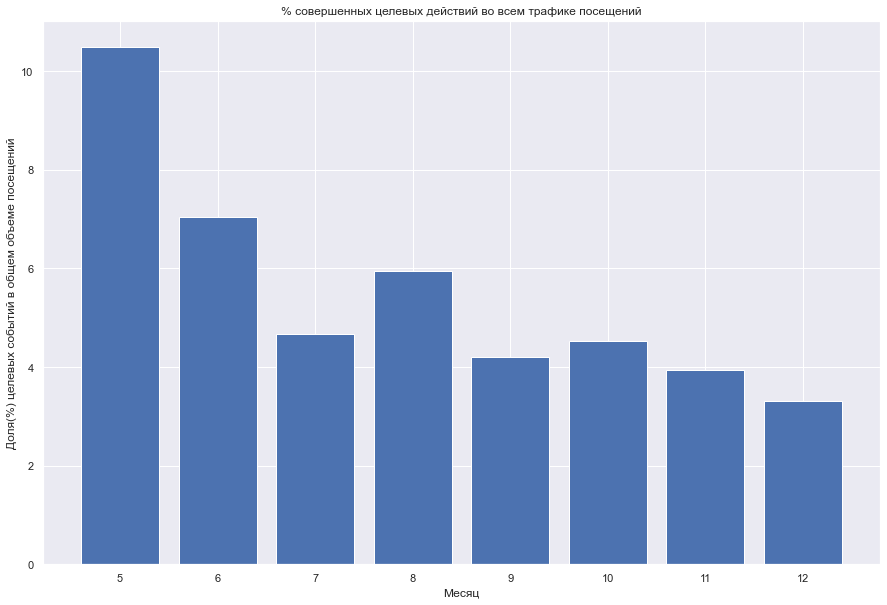

In [51]:
plt.figure(figsize=(15, 10))
plt.bar(stats['month'], stats['ratio_of_hit_to_visit'])
plt.xlabel('Месяц')
plt.ylabel('Доля(%) целевых событий в общем объеме посещений')
plt.title('% совершенных целевых действий во всем трафике посещений');
plt.show();

In [52]:
# Выведем небольшую статистику по кол-ву целевых действий через рекламу в соц.сетях
utm_list= ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
         'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

stats = df_full[df_full['utm_source'].isin(utm_list)].groupby(['utm_source'], as_index=False)['event_action'].count()
stats = stats.rename(columns={'event_action':'count'})
stats

,utm_source,count
0,ISrKoXQCxqqYvAZICvjs,75
1,IZEXUFLARCUMynmHNBGo,72
2,MvfHsxITijuriZxsqZqt,1310
3,PlbkrSYoHuZBWfYjYnfw,28
4,QxAxdyPLuQMEcrdZWdWb,782
5,gVRrcxiDQubJiljoTbGm,45


### Корреляция

В связи с тем, что наши целевая переменная также как и фичи являются категориальными перменными, то мы не можем использовать библиотеку matplotlib. Обратимся к бибилиотеке seaborn.

In [53]:
# Построим кросс-таблицу зависимости целевых действий ("оставить заявку", "заказать звонок") от типа устройства входа на сайт
pd.crosstab(df_full['device_category'],df_full['event_action'])

event_action,sub_call_number_click,sub_callback_submit_click,sub_car_claim_click,sub_car_claim_submit_click,sub_car_request_submit_click,sub_custom_question_submit_click,sub_open_dialog_click,sub_submit_success
device_category,,,,,,,,
desktop,32,81,2934,181,98,17,2072,981
mobile,1027,190,9760,1166,300,42,5751,3336
tablet,3,1,109,5,4,0,80,29


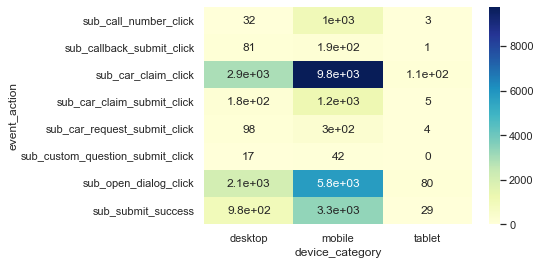

In [54]:
# Построим тепловую карту для кросс-таблицы выше
sns.heatmap(pd.crosstab(df_full['event_action'], df_full['device_category']), cmap="YlGnBu", annot=True, cbar=True);

In [55]:
# Построим кросс-таблицу, отразим статистику месяца и колличество целевых действий в разрезе каждого.
pd.crosstab(df_full['month_hit'],df_full['event_action'])

event_action,sub_call_number_click,sub_callback_submit_click,sub_car_claim_click,sub_car_claim_submit_click,sub_car_request_submit_click,sub_custom_question_submit_click,sub_open_dialog_click,sub_submit_success
month_hit,,,,,,,,
5.0,267,0,3837,0,1,0,977,1346
6.0,443,0,3139,0,5,0,1487,1535
7.0,140,63,2550,197,62,13,1377,485
8.0,170,60,2770,251,112,21,1525,589
9.0,214,76,2270,417,137,23,2069,882
10.0,246,83,2935,525,153,12,2192,1024
11.0,182,145,2541,478,164,15,2024,1055
12.0,207,79,3075,601,141,14,2347,1012


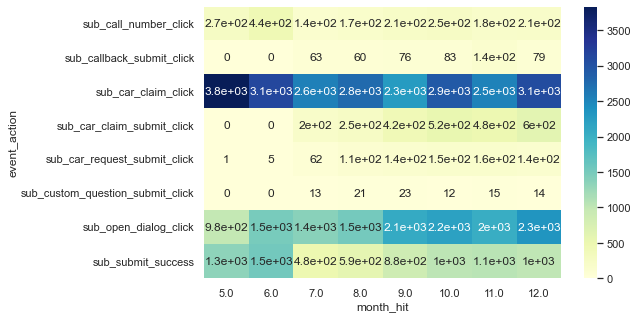

In [56]:
# Построим тепловую карту для кросс-таблицы выше
plt.figure(figsize=(8, 5)) 
sns.heatmap(pd.crosstab(df_full['event_action'], df_full['month_hit']), cmap="YlGnBu", annot=True, cbar=True);

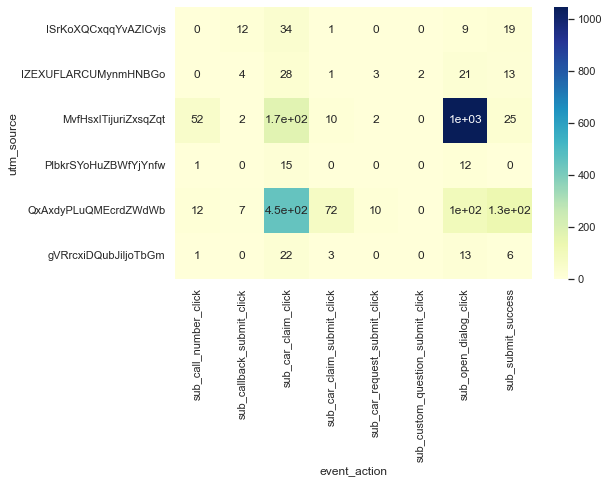

In [57]:
# Также давайте рассмотрим зависимость совершенных действий от рекалмы в соц.сетях.Какие из них принесли более всего 
# целевых событий?

ad = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']


df_full_ad=df_full[df_full['utm_source'].isin(ad)]

plt.figure(figsize=(8, 5)) 
sns.heatmap(pd.crosstab(df_full_ad['utm_source'], df_full_ad['event_action']), cmap="YlGnBu", annot=True, cbar=True);


## Проверка гипотез

#### Гипотеза: Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

- Нулевая гипотеза(H0): С точки зрения CR (Conversion Rate) в целевые события органический трафик **не отличается** от платного.
- Альтернативная гипотеза: С точки зрения CR (Conversion Rate) в целевые события органический трафик **отличаются**, чем платный.

Построим новый датафрейм со следующими колонками:
 -  месяц визита;
 - колличество визитов через органический трафик(в разрезе месяцев);
 - колличество визитов через платный трафик(в разрезе месяцев);
 - целевый действия через органический трафик(utm_medium ('organic', 'referral', '(none)'));
 - целевые действия через платный трафик;
 - найдем CR в целевые действия для платного и органического трафиков.

Обозначим уровень значимости p-value (ошибка 1-го рода) - 0.05.

In [58]:
# Найдем колличество визитов через органический трафик(в разрезе месяцев)
organic_trafic = ['organic', 'referral', '(none)']

df_visit_organic = df_full[df_full['utm_medium'].isin(organic_trafic)].groupby(['month_visit'], as_index=False)[['session_id']].count()
df_visit_organic  = df_visit_organic .rename(columns={'month_visit':'month','session_id':'visit_organic'})
df_visit_organic 

,month,visit_organic
0,5.0,54819
1,6.0,37882
2,7.0,32470
3,8.0,29598
4,9.0,36164
5,10.0,30200
6,11.0,38885
7,12.0,31115


In [59]:
# Найдем колличество визитов через платный трафик(в разрезе месяцев)
df_visit_paid = df_full[~df_full['utm_medium'].isin(organic_trafic)].groupby(['month_visit'], as_index=False)[['session_id']].count()
df_visit_paid = df_visit_paid.rename(columns={'month_visit':'month','session_id':'visit_paid'})
df_visit_paid

,month,visit_paid
0,5.0,6394
1,6.0,56042
2,7.0,72254
3,8.0,62800
4,9.0,108770
5,10.0,127801
6,11.0,128915
7,12.0,194465


In [60]:
# Найдем колличество  целевых действий через органический трафик(utm_medium ('organic', 'referral', '(none)'))
df_hit_organic = df_full[df_full['utm_medium'].isin(organic_trafic)].groupby(['month_hit'], as_index=False)[['event_action']].count()
df_hit_organic = df_hit_organic.rename(columns={'month_hit':'month','event_action': 'hit_organic'})
df_hit_organic

,month,hit_organic
0,5.0,3517
1,6.0,2179
2,7.0,1303
3,8.0,1242
4,9.0,1105
5,10.0,1023
6,11.0,819
7,12.0,568


In [61]:
# Найдем колличество  целевых действий через платный трафик
df_hit_paid = df_full[~df_full['utm_medium'].isin(organic_trafic)].groupby(['month_hit'], as_index=False)[['event_action']].count()
df_hit_paid = df_hit_paid.rename(columns={'month_hit':'month','event_action': 'hit_paid'})
df_hit_paid

,month,hit_paid
0,5.0,2911
1,6.0,4430
2,7.0,3584
3,8.0,4256
4,9.0,4983
5,10.0,6147
6,11.0,5785
7,12.0,6908


In [62]:
# Объединим все 4 таблицы выше в одну сводную таблицу
df_1 = pd.merge(left=df_visit_organic, right=df_visit_paid, on='month', how='outer')
df_2 = pd.merge(left=df_hit_organic, right=df_hit_paid, on='month', how='outer')
df_medium = pd.merge(left=df_1, right=df_2, on='month', how='outer')

# Присвоим переменной значения CR (с точки зрения целевых событий) 
df_medium['CR_organic'] = (df_medium.hit_organic / df_medium.visit_organic)*100
df_medium['CR_paid'] = (df_medium.hit_paid / df_medium.visit_paid)*100

df_medium

,month,visit_organic,visit_paid,hit_organic,hit_paid,CR_organic,CR_paid
0,5.0,54819,6394,3517,2911,6.415659,45.527057
1,6.0,37882,56042,2179,4430,5.752072,7.904786
2,7.0,32470,72254,1303,3584,4.012935,4.960279
3,8.0,29598,62800,1242,4256,4.196229,6.777070
4,9.0,36164,108770,1105,4983,3.055525,4.581226
5,10.0,30200,127801,1023,6147,3.387417,4.809822
6,11.0,38885,128915,819,5785,2.106211,4.487453
7,12.0,31115,194465,568,6908,1.825486,3.552310


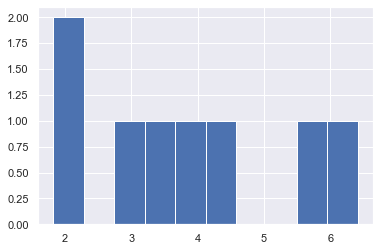

In [63]:
plt.hist(df_medium.CR_organic);

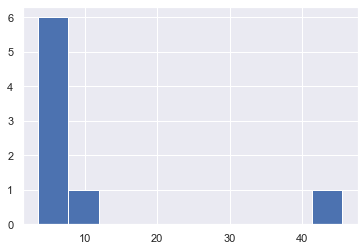

In [64]:
plt.hist(df_medium.CR_paid);

(array([[5., 2., 0., 0., 0., 0., 0., 0., 0., 1.],
        [7., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([ 1.8254861 ,  6.19564315, 10.5658002 , 14.93595725, 19.30611431,
        23.67627136, 28.04642841, 32.41658546, 36.78674251, 41.15689956,
        45.52705662]),
 <a list of 2 BarContainer objects>)

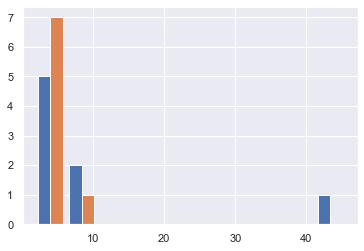

In [65]:
plt.hist([df_medium.CR_paid, df_medium.CR_organic])

Проверим, что данные распределены нормально с использованеим теста Шапиро-Уилка: (Н0) случайная величина X распределена нормально. 

In [66]:
from scipy import stats
stats.shapiro(df_medium.CR_organic)

ShapiroResult(statistic=0.946597695350647, pvalue=0.6769137978553772)

Выборка распределна нормально p>0.05

In [67]:
stats.shapiro(df_medium.CR_paid)

ShapiroResult(statistic=0.5050210356712341, pvalue=1.1875833479280118e-05)

Выборки не распределны номрально, pvalue < 0.05

Далее, принимая во внимание, что выборки не зависимы, было принято решение использовать непараметрический статистический проверку гипотезы Манна-Уитни.

In [68]:
stats.mannwhitneyu(df_medium.CR_organic, df_medium.CR_paid)

MannwhitneyuResult(statistic=12.0, pvalue=0.037917637917637914)

`p-value < 5%, а значит мы можем отклонить Н0 гипотезу. Т.е. органический и платный трафики все таки различаются.`

In [69]:
stats.mannwhitneyu(df_medium.CR_organic, df_medium.CR_paid, alternative='less')

MannwhitneyuResult(statistic=12.0, pvalue=0.018958818958818957)

`Если мы предложим, что органический трафик может быть меньше платного, то получим результат p-value < 5%, а значит мы можем отклонить Н0 гипотезу и принять альтернативную.`

#### Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

- Нулевая гипотеза(H0): С точки зрения CR (Conversion Rate) в целевые события трафик с мобильных устройств **не отличается** от десктопного трафика
- Альтернативная гипотеза: С точки зрения CR (Conversion Rate) в целевые события трафик с мобильных устройств **отличается** от десктопного трафика.

Построим новый датафрейм со следующими колонками:

- месяц визита;
- колличество визитов через  мобильный трафик(в разрезе месяцев);
- колличество визитов через десктопный трафик(в разрезе месяцев);
- целевый действия через мобильный трафик;
- целевые дейсвия через десктопный трафик;
- CR в целевые действия для мобильного и десктопного трафиков.

Обозначим уровень значимости p-value (ошибка 1-го рода) - 0.05.

In [70]:
df_visit_mobile = df_full[df_full['device_category'] == 'mobile'].groupby(['month_visit'], as_index=False)[['device_category']].count()
df_visit_mobile  = df_visit_mobile .rename(columns={'month_visit':'month','device_category':'visits_mobile'})
df_visit_mobile 

,month,visits_mobile
0,5.0,40564
1,6.0,76573
2,7.0,69150
3,8.0,69186
4,9.0,111321
5,10.0,132752
6,11.0,136496
7,12.0,195639


In [71]:
df_visit_desktop = df_full[df_full['device_category'] == 'desktop'].groupby(['month_visit'], as_index=False)[['device_category']].count()
df_visit_desktop = df_visit_desktop.rename(columns={'month_visit':'month','device_category':'visits_desktop'})
df_visit_desktop

,month,visits_desktop
0,5.0,19690
1,6.0,16397
2,7.0,34322
3,8.0,22329
4,9.0,32039
5,10.0,23733
6,11.0,29890
7,12.0,28248


In [72]:
df_hit_mobile = df_full[df_full['device_category'] == 'mobile'].groupby(['month_hit'], as_index=False)[['event_action']].count()
df_hit_mobile = df_hit_mobile.rename(columns={'month_hit':'month','event_action': 'hit_mobile'})
df_hit_mobile

,month,hit_mobile
0,5.0,2196
1,6.0,2710
2,7.0,1976
3,8.0,2275
4,9.0,2512
5,10.0,3370
6,11.0,2937
7,12.0,3596


In [73]:
df_hit_desktop = df_full[df_full['device_category'] == 'desktop'].groupby(['month_hit'], as_index=False)[['event_action']].count()
df_hit_desktop = df_hit_desktop.rename(columns={'month_hit':'month','event_action': 'hit_desktop'})
df_hit_desktop

,month,hit_desktop
0,5.0,1336
1,6.0,1025
2,7.0,746
3,8.0,734
4,9.0,793
5,10.0,623
6,11.0,678
7,12.0,461


In [74]:
df_1= pd.merge(left=df_visit_mobile, right=df_visit_desktop, on='month', how='outer')
df_2= pd.merge(left=df_hit_mobile, right=df_hit_desktop, on='month', how='outer')
df_devices= pd.merge(left=df_1, right=df_2, on='month', how='outer')

df_devices['CR_mobile'] = (df_devices.hit_mobile / df_devices.visits_mobile)*100
df_devices['CR_desktop'] = (df_devices.hit_desktop / df_devices.visits_desktop)*100

df_devices

,month,visits_mobile,visits_desktop,hit_mobile,hit_desktop,CR_mobile,CR_desktop
0,5.0,40564,19690,2196,1336,5.413667,6.785170
1,6.0,76573,16397,2710,1025,3.539106,6.251144
2,7.0,69150,34322,1976,746,2.857556,2.173533
3,8.0,69186,22329,2275,734,3.288238,3.287205
4,9.0,111321,32039,2512,793,2.256537,2.475108
5,10.0,132752,23733,3370,623,2.538568,2.625037
6,11.0,136496,29890,2937,678,2.151711,2.268317
7,12.0,195639,28248,3596,461,1.838079,1.631974


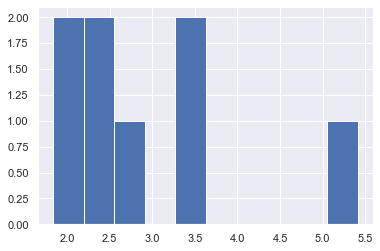

In [75]:
plt.hist(df_devices.CR_mobile);

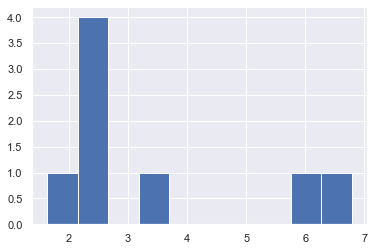

In [76]:
plt.hist(df_devices.CR_desktop);

Проверим, что данные распределены нормально с использованеим теста Шапиро-Уилка: (Н0) случайная величина X распределена нормально. 

In [77]:
stats.shapiro(df_devices.CR_mobile) 

ShapiroResult(statistic=0.8665685653686523, pvalue=0.139485165476799)

Выборки распределны номрально, pvalue > 0.05

In [78]:
stats.shapiro(df_devices.CR_desktop)

ShapiroResult(statistic=0.7831298112869263, pvalue=0.018836600705981255)

Выборки не распределны номрально, pvalue < 0.05

Далее, принимая во внимание, что выборки не зависимы, было принято решение использовать непараметрический статистический проверку гипотезы Манна-Уитни.

In [79]:
stats.mannwhitneyu(df_devices.CR_mobile, df_devices.CR_desktop)

MannwhitneyuResult(statistic=31.0, pvalue=0.959129759129759)

`p-value > 0.05, а значит Н0 гипотезу отклонить при заданном уровне значимости нельзя, нет достаточно аргументов для того, чтобы  отвергнуть ее. Т.е. трафик между мобильными и дескоптными устройстваим не отличаются
`

#### Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.


- Нулевая гипотеза(H0): Трафик из городов присутствия (Москва и область, Санкт-Петербург) **не отличается** от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
- Альтернативная гипотеза: Трафик из городов присутствия (Москва и область, Санкт-Петербург) **отличается** от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

Построим новый датафрейм со следующими колонками:

- месяц визита;
- колличество визитов из Москвы (включая область) и Сантк-Петербург (в разрезе месяцев);
- колличество визитов из других регионов (в разрезе месяцев);
- целевый действия, совершенные посетителями из г. Москва, московская область и Санкт-Петербург (main cities);
- целевые действия, совершенные посетителями из других городов РФ (other cities);
- CR в целевые действия из main cities и other cities.

Обозначим уровень значимости p-value (ошибка 1-го рода) - 0.05.

In [80]:
# Обозначим датафрейм с фильтром только города РФ
russia = df_full[df_full['geo_country'] == 'Russia']
russia.head()

,session_id,utm_source,utm_medium,utm_campaign,device_category,geo_country,geo_city,year_visit,month_visit,event_action,car_brand,year_hit,month_hit
0,9055434745589932991.1637753792.1637753792,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Zlatoust,2021.0,11.0,NaN,NaN,NaN,NaN
1,905544597018549464.1636867290.1636867290,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,mobile,Russia,Moscow,2021.0,11.0,NaN,NaN,NaN,NaN
2,9055446045651783499.1640648526.1640648526,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,mobile,Russia,Krasnoyarsk,2021.0,12.0,NaN,NaN,NaN,NaN
3,9055447046360770272.1622255328.1622255328,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021.0,5.0,NaN,NaN,NaN,NaN
4,9055447046360770272.1622255345.1622255345,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,mobile,Russia,Moscow,2021.0,5.0,NaN,NaN,NaN,NaN


In [81]:
# Найдем колличество визитов из Москвы (включая область) и Сантк-Петербург
main_city = ['Moscow', 'Saint Petersburg', 'Mytishchi','Balashikha', 'Pushkino','Reutov', 'Domodedovo','Krasnogorsk', 'Nakhabino', 'Stupino', 'Serpukhov',
             'Fryazino','Kotelniki','Korolyov', 'Dolgoprudny', 'Khimki', 'Dubna','Kolomna','Naro-Fominsk', 'Protvino', 'Zhukovskiy', 'Ivanteyevka', 
             'Yegoryevsk','Vidnoye', 'Kraskovo', 'Lyubertsy', 'Odintsovo', 'Voskresensk','Ramenskoye','Shchyolkovo','Tomilino','Klin', 'Dedovsk', 
             'Sergiyev Posad', 'Dmitrov','Podolsk', 'Lytkarino','Istra','Volokolamsk', 'Elektrostal', 'Malakhovka','Orekhovo-Zuyevo', 'Chekhov',
             'Dzerzhinsk''Lobnya', 'Staraya Kupavna', 'Krasnoznamensk', 'Povarovo''Zagorjanskas', 'Beloozyorskiy','Lukhovitsy','Elektrougli','Ruza',
             'Khotkovo', 'Noginsk','Kratovo','Mozhaysk','Kubinka','Chernogolovka', 'Aprelevka','Pavlovsky Posad', 'Shatura', 'Losino-Petrovsky',
             'Pushchino','Golitsyno', 'Zvenigorod', 'Selyatino', 'Krasnoarmeysk','Solnechnogorsk', 'Kalininets', 'Elektrogorsk', 'Monino', 'Lesnoy Gorodok',
             'Tuchkovo', 'Kashira','Oktyabrsky', 'Shakhovskaya','Kurovskoye','Yakhroma','Likino-Dulyovo', 'Vlasikha']

df_visit_main= russia[russia['geo_city'].isin(main_city)].groupby(['month_visit'], as_index=False)['geo_city'].count()
df_visit_main = df_visit_main.rename(columns={'month_visit':'month','geo_city':'visits_main'})
df_visit_main

,month,visits_main
0,5.0,42994
1,6.0,65594
2,7.0,72837
3,8.0,70073
4,9.0,104954
5,10.0,89591
6,11.0,106882
7,12.0,127245


In [82]:
# Найдем колличество визитов из остальных городов
df_visit_other= russia[~russia['geo_city'].isin(main_city)].groupby(['month_visit'], as_index=False)['geo_city'].count()
df_visit_other = df_visit_other.rename(columns={'month_visit':'month','geo_city':'visits_other'})
df_visit_other

,month,visits_other
0,5.0,16225
1,6.0,25137
2,7.0,29460
3,8.0,19502
4,9.0,35867
5,10.0,61161
6,11.0,56019
7,12.0,91459


In [83]:
# Найдем колличество целевых действий только из г. Москва, московская область и Санкт-Петербург

df_hit_main=  russia[russia['geo_city'].isin(main_city)].groupby(['month_hit'], as_index=False)['event_action'].count()
df_hit_main = df_hit_main.rename(columns = {'month_hit':'month','event_action': 'hit_main'})
df_hit_main

,month,hit_main
0,5.0,2466
1,6.0,2614
2,7.0,2057
3,8.0,2251
4,9.0,2414
5,10.0,2322
6,11.0,2266
7,12.0,2479


In [84]:
# Найдем колличество целевых действий только из других городов РФ
df_hit_other=  russia[~russia['geo_city'].isin(main_city)].groupby(['month_hit'], as_index=False)['event_action'].count()
df_hit_other = df_hit_other.rename(columns = {'month_hit':'month','event_action': 'hit_other'})
df_hit_other

,month,hit_other
0,5.0,991
1,6.0,1058
2,7.0,623
3,8.0,697
4,9.0,857
5,10.0,1647
6,11.0,1302
7,12.0,1520


In [85]:
# Объединим все датафреймы и расчитаем CR в целевые события из main cities и other cities.
df_1 = pd.merge(left=df_visit_main, right=df_visit_other, on='month', how='outer')
df_2 = pd.merge(left=df_hit_main, right=df_hit_other, on='month', how='outer')
df_geo = pd.merge(left=df_1, right=df_2, on='month', how='outer')

df_geo['CR_main'] = (df_geo.hit_main / df_geo.visits_main)*100
df_geo['CR_other'] = (df_geo.hit_other/ df_geo.visits_other)*100

df_geo

,month,visits_main,visits_other,hit_main,hit_other,CR_main,CR_other
0,5.0,42994,16225,2466,991,5.735684,6.107858
1,6.0,65594,25137,2614,1058,3.985121,4.208935
2,7.0,72837,29460,2057,623,2.824114,2.114732
3,8.0,70073,19502,2251,697,3.212364,3.573992
4,9.0,104954,35867,2414,857,2.300055,2.389383
5,10.0,89591,61161,2322,1647,2.591778,2.692893
6,11.0,106882,56019,2266,1302,2.120095,2.324211
7,12.0,127245,91459,2479,1520,1.948210,1.661947


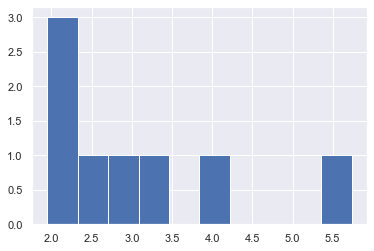

In [86]:
plt.hist(df_geo['CR_main']);

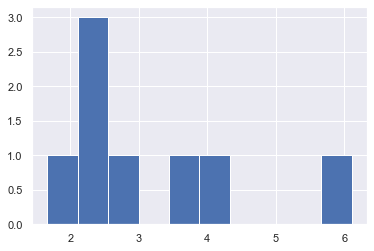

In [87]:
plt.hist(df_geo['CR_other']);

Проверим, что данные распределены нормально с использованеим теста Шапиро-Уилка: (Н0) случайная величина X распределена нормально. 

In [88]:
stats.shapiro(df_geo.CR_main)

ShapiroResult(statistic=0.8479014039039612, pvalue=0.09071122854948044)

In [89]:
stats.shapiro(df_geo.CR_other)

ShapiroResult(statistic=0.8698532581329346, pvalue=0.1502324938774109)

Проверим, что дисперсии равны. (H0: Выборки имеют равные дисперсии)

In [90]:
stats.levene(df_geo.CR_main, df_geo.CR_other)

LeveneResult(statistic=0.09291511459624664, pvalue=0.7649877836033463)

Выборки независимы, номально распределны и имеют равные дисперсии.
Для проверки следующей гипотезы используется тест Т-Критерий Стьюдента (H0: Средние в выборках равны)

In [91]:
stats.ttest_ind(df_geo.CR_main, df_geo.CR_other)

Ttest_indResult(statistic=-0.06564976909748574, pvalue=0.9485849276714828)

`p-value имеет значение больше 0,05, что у нас имеются недостаточно аргументов, чтобы отвергнуть нулевую гипотезу (при заданом уровне значимости).`

## Вопросы продуктовой команды:


#### 1.  Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

##### 1.1. Из каких источников к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [92]:
# Составим датафрейм по колличеству всех визитов в разрезе каналов привлечения
df_source = df_full.groupby(['utm_source'], as_index=False)['month_visit'].count()
df_source = df_source.rename(columns={'month_visit':'count_visit'})

#  Составим датафрейм по колличеству совершенных целевых действий в разрезе каналов привлечения
df_source_hit = df_full.groupby(['utm_source'], as_index=False)['event_action'].count()
df_source_hit  = df_source_hit .rename(columns={'event_action':'count_hit'})

# Объединим датафреймы и отсортируем колонку count_hit по убыванию
df_source= pd.merge(left=df_source, right=df_source_hit, on='utm_source', how='outer')
df_source.sort_values(by ='count_hit', ascending=False)

,utm_source,count_visit,count_hit
130,ZpYIoDJMcFzVoPFsHGJL,325689,8967
154,fDLlAcSmythWSCVMvqvL,170158,6007
181,kjsLglQLzykiRbcDiGcD,150371,3362
137,bByPQxmDaMXgpHeypKSM,57485,3122
5,BHcvLfOaCWvWTykYqHVe,65264,2214
...,...,...,...
124,YmnqPKMqodkOEiiyvBYk,6,0
34,HJnvbONaVHFanPpYHwts,15,0
128,ZbcOcgPIxJThEWbhHyVc,1,0
129,ZeHvxPFwjACxsjFESmAv,10,0


`Самый целевой трафик с точки зрения объема трафика идет с ZpYIoDJMcFzVoPFsHGJL`

In [93]:
# Добавим атрибут CR в целевую переменную с точки зрения каналов привлечения
df_source['CR_source'] = (df_source.count_hit / df_source.count_visit)*100

df_source.sort_values(by='CR_source', ascending=False).head(5)

,utm_source,count_visit,count_hit,CR_source
125,YpBKcihLLfFjWuxOLfvW,1,1,100.000000
155,fJCYsujgSxIHFbOmgDdN,4,3,75.000000
51,LIWKeifdTCbuNeniIUqm,24,16,66.666667
116,XzfzEBYZWgSDtJNXOadn,2,1,50.000000
12,CqeIpFwJscTsZoYXdHsP,2,1,50.000000


`Самый целевой трафик с точки зрения CR целевые действия идет из  идет с YpBKcihLLfFjWuxOLfvW и fJCYsujgSxIHFbOmgDdN `

##### 1.2. Из каких  кампаний к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [94]:
# Составим датафрейм по колличеству всех визитов в разрезе рекламных кампаний.
df_campaign = df_full.groupby(['utm_campaign'], as_index=False)['month_visit'].count()
df_campaign = df_campaign.rename(columns={'month_visit':'count_visit'})

#  Составим датафрейм по колличеству совершенных целевых действий в разрезе рекламных кампаний.
df_campaign_hit = df_full.groupby(['utm_campaign'], as_index=False)['event_action'].count()
df_campaign_hit  = df_campaign_hit .rename(columns={'event_action':'count_hit'})

# Объединим датафреймы и отсортируем колонку count_hit по убыванию
df_campaign= pd.merge(left=df_campaign, right=df_campaign_hit, on='utm_campaign', how='outer')
df_campaign.sort_values(by ='count_hit', ascending=False).head(5)

,utm_campaign,count_visit,count_hit
81,LTuZkdKfxRGVceoWkVyg,384917,14656
78,LEoPHuyFvzoNfnzGgfcd,182907,5263
239,gecBYcKZCPMcVYdSSzKP,74877,2528
37,FTjNLDyTrXaWYgZymFkV,140008,1419
326,sbJRYgVfvcnqKJNDDYIr,11446,325


`Самый целевой трафик с точки зрения объема трафика идет с LTuZkdKfxRGVceoWkVyg`

In [95]:
df_campaign['CR_campaign'] = (df_campaign.count_hit / df_campaign.count_visit)*100

df_campaign.sort_values(by='CR_campaign', ascending=False).head(10)

,utm_campaign,count_visit,count_hit,CR_campaign
63,JkhCpeDGCtTwhwqWLywv,1,1,100.000000
88,MHdHrBKQwbDaRalwnlJq,1,1,100.000000
54,IRKNegNgOUQLwudzMElF,4,3,75.000000
274,lndNIerCYECRQvBTyTye,36,20,55.555556
137,SbYAsCvXapXBOIxEKBZs,2,1,50.000000
142,TOSjvKcurFlcKJijjpYP,31,10,32.258065
265,kPFxaNFzjAAXpTmoDqwY,4,1,25.000000
344,vZqcBrFwxYPoYzJyhYGI,9,2,22.222222
196,ZdOcFAQpRQWuFZHHkEJQ,17,3,17.647059
280,mtQufDECJCXyKwpKQPvz,6,1,16.666667


`Самый целевой трафик с точки зрения CR в целевые действия идет из JkhCpeDGCtTwhwqWLywv, MHdHrBKQwbDaRalwnlJq`

##### 1.3. Из каких устройств к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [96]:
# Составим датафрейм по колличеству всех визитов в разрезе рекламных кампаний.
df_devices = df_full.groupby(['device_category'], as_index=False)['month_visit'].count()
df_devices = df_devices.rename(columns={'month_visit':'count_visit'})

#  Составим датафрейм по колличеству совершенных целевых действий в разрезе рекламных кампаний.
df_devices_hit = df_full.groupby(['device_category'], as_index=False)['event_action'].count()
df_devices_hit  = df_devices_hit .rename(columns={'event_action':'count_hit'})

# Объединим датафреймы и отсортируем колонку count_hit по убыванию
df_devices= pd.merge(left=df_devices, right=df_devices_hit, on='device_category', how='outer')
df_devices.sort_values(by ='count_hit', ascending=False).head(5)

,device_category,count_visit,count_hit
1,mobile,831681,21572
0,desktop,206648,6396
2,tablet,10245,231


`Самый целевой трафик с точки зрения объема трафика идет с mobile`

In [97]:
df_devices.count_visit.sum()

1048574

In [98]:
df_devices['CR_device'] = (df_devices.count_hit / df_devices.count_visit)*100

df_devices.sort_values(by='CR_device', ascending=False).head(5)

,device_category,count_visit,count_hit,CR_device
0,desktop,206648,6396,3.095118
1,mobile,831681,21572,2.593783
2,tablet,10245,231,2.254758


`Самый целевой трафик с точки зрения CR в целевые действия идет из desktop`

##### 1.4. Из каких локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [99]:
# Составим датафрейм по колличеству всех визитов в локаций.
df_country = df_full.groupby(['geo_country'], as_index=False)['month_visit'].count()
df_country = df_country.rename(columns={'month_visit':'count_visit'})

#  Составим датафрейм по колличеству совершенных целевых действий в разрезе локаций.
df_country_hit = df_full.groupby(['geo_country'], as_index=False)['event_action'].count()
df_country_hit  = df_country_hit .rename(columns={'event_action':'count_hit'})

# Объединим датафреймы и отсортируем колонку count_hit по убыванию
df_country= pd.merge(left=df_country, right=df_country_hit, on='geo_country', how='outer')
df_country.sort_values(by ='count_hit', ascending=False).head(5)

,geo_country,count_visit,count_hit
112,Russia,1015000,27564
143,Ukraine,5134,113
46,Germany,1213,43
146,United States,6586,32
66,Kazakhstan,1297,32


In [100]:
# Составим датафрейм по колличеству всех визитов в разрезе городов.
df_city = df_full.groupby(['geo_city'], as_index=False)['month_visit'].count()
df_city = df_city.rename(columns={'month_visit':'count_visit'})

#  Составим датафрейм по колличеству совершенных целевых действий в разрезе городов.
df_city_hit = df_full.groupby(['geo_city'], as_index=False)['event_action'].count()
df_city_hit  = df_city_hit .rename(columns={'event_action':'count_hit'})

# Объединим датафреймы и отсортируем колонку count_hit по убыванию
df_city= pd.merge(left=df_city, right=df_city_hit, on='geo_city', how='outer')
df_city.sort_values(by ='count_hit', ascending=False).head(5)

,geo_city,count_visit,count_hit
1120,Moscow,453172,13129
1514,Saint Petersburg,168245,4035
0,(not set),43844,877
772,Kazan,16885,650
860,Krasnodar,18243,611


`Самый целевой трафик с точки зрения объема трафика идет с России и из города Москва`

In [101]:
df_country['CR_country'] = (df_country.count_hit / df_country.count_visit)*100

df_country.sort_values(by='CR_country', ascending=False).head(5)

,geo_country,count_visit,count_hit,CR_country
106,Philippines,12,2,16.666667
87,Morocco,94,14,14.893617
2,Albania,23,3,13.043478
117,Serbia,63,6,9.523810
60,Iraq,63,5,7.936508


In [102]:
df_city['CR_city'] = (df_city.count_hit / df_city.count_visit)*100

df_city.sort_values(by='CR_city', ascending=False).head(10)

,geo_city,count_visit,count_hit,CR_city
1257,Nybro,1,1,100.000000
1580,Seminole,1,1,100.000000
1089,Middletown,1,1,100.000000
816,Klaipeda,1,1,100.000000
1429,Qingdao,1,1,100.000000
1495,Royan,1,1,100.000000
592,Gravesend,1,1,100.000000
913,Laguna Niguel,1,1,100.000000
1581,Senftenberg,1,1,100.000000
1736,Tangier,3,2,66.666667


`Самый целевой трафик с точки зрения CR в целевые действия идет c Philippines и Nybro, Seminole и т.д.`

#### 2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [103]:
# Составим датафрейм по колличеству всех  целевых событий в разрезе просмотра машин
df_car= df_full[df_full['car_brand'] != 'no_car'].groupby(['car_brand'], as_index=False)['session_id'].count()
df_car= df_car.rename(columns={'session_id':'count_hit'})
df_car.sort_values(by = 'count_hit', ascending=False)

,car_brand,count_hit
25,skoda,3477
15,lada-vaz,2364
30,volkswagen,2176
14,kia,1167
18,mercedes-benz,1035
28,toyota,731
24,renault,614
20,nissan,613
2,bmw,437
9,haval,218


`Автомобиль модели skoda пользуется самым большим спросом. Лучший показатель CR в целевые действия показала следующая модель skoda (нет смысла расчитывать CR. И так видно что большинство пользователей заиинтересованы в этой машине)` 

#### 3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

Для того, чтобы оценить эффективность рекламы в соц.сетях требуют маркетинговые метрики. В рамках даннйо задачи нас не интересует взяли ли они машину в прокат. Нам важно насколько успешной была реклама и какой CR в целевые действия.

В виду того, что у нас не так много информации о такой рекламе в соц.сетях. Мы можем проанализировать:
- какой % от общих визитов составляет визиты посредством рекламы в соц.сетях;
- СR в целевые действия пользователей, зашедших на сайт через соц.рекламу и через иные источники. 

Нам необходимо подготовить сводную таблицу, которая будет в себя включать:
 - реклама в соц.сетях: визиты и целевые события (df_source_ads1, df_source_ads2), а также,
 - реклама в иных местах:визиты и целевые события (df_source_ads3, df_source_ads4).

Далее, мы создадим таблицус данными из таблиц выше (df), и добавим в нее новый атрибут CR в целевые действия.

In [104]:
df_full.utm_source.describe()

count                  1048574
unique                     245
top       ZpYIoDJMcFzVoPFsHGJL
freq                    325689
Name: utm_source, dtype: object

In [105]:
# Колличество визитов по трафику рекламы в соц.сетях
ads = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
        'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

df_source_ads1 = df_full[df_full['utm_source'].isin(ads)].groupby(['utm_source'], as_index=False)['month_visit'].count()
df_source_ads1  = df_source_ads1.rename(columns={'month_visit':'visit_social'})
df_source_ads1

,utm_source,visit_social
0,ISrKoXQCxqqYvAZICvjs,4701
1,IZEXUFLARCUMynmHNBGo,2574
2,MvfHsxITijuriZxsqZqt,105542
3,PlbkrSYoHuZBWfYjYnfw,11684
4,QxAxdyPLuQMEcrdZWdWb,29044
5,gVRrcxiDQubJiljoTbGm,1559


In [106]:
df_source_ads1.visit_social.sum()

155104

In [107]:
# Колличество целевых дейсвтий по трафику рекламы в соц.сетях
df_source_ads2 = df_full[df_full['utm_source'].isin(ads)].groupby(['utm_source'], as_index=False)['month_hit'].count()
df_source_ads2  = df_source_ads2.rename(columns={'month_hit':'hit_social'})
df_source_ads2

,utm_source,hit_social
0,ISrKoXQCxqqYvAZICvjs,75
1,IZEXUFLARCUMynmHNBGo,72
2,MvfHsxITijuriZxsqZqt,1310
3,PlbkrSYoHuZBWfYjYnfw,28
4,QxAxdyPLuQMEcrdZWdWb,782
5,gVRrcxiDQubJiljoTbGm,45


In [108]:
df_source_ads2.hit_social.sum()

2312

In [109]:
# Колличество визитов по трафику рекламы в иных местах (кроме соц.сетей)
df_source_ads3 = df_full[~df_full['utm_source'].isin(ads)].groupby(['utm_source'], as_index=False)['month_visit'].count()
df_source_ads3  = df_source_ads3.rename(columns={'month_visit':'visit_other'})
df_source_ads3

,utm_source,visit_other
0,AHgbtEjTEsiUMJouiDYS,17
1,ANoZJgYuPrWNkAAchryx,6
2,ArbfvYgWhqxkzywKqpQf,13
3,AuJjYKxJakEqFnCmyFtz,3
4,BAZCuyHZnaPrMGOMrcCQ,1
...,...,...
234,yxJKymlSGVuKIPTxbysx,3
235,zGUBrOvMRpLqBkJPUsYo,2
236,zhqxcsahQYAzJvRzebNp,21
237,zslzdtckVsyxcYqKBRRn,2


In [110]:
df_source_ads3.visit_other.sum()

893470

In [111]:
# Колличество целевых дейсвтий по трафику рекламы в иных местах (кроме соц.сетей)
df_source_ads4 = df_full[~df_full['utm_source'].isin(ads)].groupby(['utm_source'], as_index=False)['month_hit'].count()
df_source_ads4  = df_source_ads4.rename(columns={'month_hit':'hit_other'})
df_source_ads4

,utm_source,hit_other
0,AHgbtEjTEsiUMJouiDYS,0
1,ANoZJgYuPrWNkAAchryx,0
2,ArbfvYgWhqxkzywKqpQf,0
3,AuJjYKxJakEqFnCmyFtz,0
4,BAZCuyHZnaPrMGOMrcCQ,0
...,...,...
234,yxJKymlSGVuKIPTxbysx,1
235,zGUBrOvMRpLqBkJPUsYo,0
236,zhqxcsahQYAzJvRzebNp,1
237,zslzdtckVsyxcYqKBRRn,0


In [112]:
df_source_ads4.hit_other.sum()

25887

In [113]:
# Составим сводную таблицу где укажем общее число визитов и целевых дейсвий по 2-м показателям: реклама в соц.сетях и реклама в иных местах.
data = [{'advertisement': 'social_media', 'visit': df_source_ads1.visit_social.sum(), 'hit': df_source_ads2.hit_social.sum()},
        {'advertisement': 'other_media', 'visit': df_source_ads3.visit_other.sum(), 'hit': df_source_ads4.hit_other.sum()}
       ]
df_ads = pd.DataFrame(data)
df_ads['CR']= (df_ads.hit / df_ads.visit)*100
df_ads

,advertisement,visit,hit,CR
0,social_media,155104,2312,1.490613
1,other_media,893470,25887,2.897355


`Согласно общим данным, 1,5% CR это неплохое значение для этого показатель.`

`В текущих реалиях присутсвие в соц.сетях необходимо для всех бизнесов, так как население проводит значительную часть времени во всяких различных приложениях как на телефонах так и за ноутбуками. Хорошая реклама никогда не помешает. Но связи с тем, что нет достаточной информации о рекламной кампании в целом, то я не могу принять во внимание какие либо иные показатели, нежели чем CR в целевые действия.`

`Other_media (visit) в >6 раз больше чем social_media, тогда как CR вырос всего в 2 раза.  Т.е. увеличение social_media всего в 2 раза даст нам резльтат other_media.`
`Необходим развивать данный канал продвижения`

In [114]:
# Также рассмотрим CR в целевые события в разрезе месяцев для соц.сетей.Построим сводную таблицу.

ads = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
        'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

df_ads_visit = df_full[df_full['utm_source'].isin(ads)].groupby(['month_visit'], as_index=False)['utm_source'].count()
df_ads_visit  = df_ads_visit.rename(columns={'month_visit':'month','utm_source':'count_visit'})

df_ads_hit = df_full[df_full['utm_source'].isin(ads)].groupby(['month_hit'], as_index=False)['utm_source'].count()
df_ads_hit  = df_ads_hit.rename(columns={'month_hit':'month','utm_source':'count_hit'})

df_merge= pd.merge(left=df_ads_visit, right=df_ads_hit, on='month', how='outer')

df_merge['CR_ads_total'] = (df_merge.count_hit / df_merge.count_visit.sum())*100
df_merge['CR_ads_per_month'] = (df_merge.count_hit / df_merge.count_visit)*100
df_merge


,month,count_visit,count_hit,CR_ads_total,CR_ads_per_month
0,5.0,7,1,0.000645,14.285714
1,6.0,10054,182,0.117341,1.810225
2,7.0,4667,32,0.020631,0.685665
3,8.0,16943,252,0.162472,1.487340
4,9.0,32232,393,0.253378,1.219285
5,10.0,28613,395,0.254668,1.380491
6,11.0,27509,476,0.306891,1.730343
7,12.0,35079,581,0.374587,1.656262


`Мы видим, что из месяца в месяц идет рост CR что означает, что реклама работает.`
`Полагаю, что компании стоит рассмотреть возможность увеличить рекламу в соц.сетях`

In [115]:
# Также рассмотрим CR в целевые события в разрезе месяцев для рекламы в иных местах. Построим сводную таблицу.

ads = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
        'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

df_other_visit = df_full[~df_full['utm_source'].isin(ads)].groupby(['month_visit'], as_index=False)['utm_source'].count()
df_other_visit  = df_other_visit.rename(columns={'month_visit':'month','utm_source':'count_visit'})

df_other_hit = df_full[~df_full['utm_source'].isin(ads)].groupby(['month_hit'], as_index=False)['utm_source'].count()
df_other_hit  = df_other_hit.rename(columns={'month_hit':'month','utm_source':'count_hit'})

df_merge= pd.merge(left=df_other_visit, right=df_other_hit, on='month', how='outer')

df_merge['CR_other_total'] = (df_merge.count_hit / df_merge.count_visit.sum())*100
df_merge['CR_other_per_month'] = (df_merge.count_hit / df_merge.count_visit)*100
df_merge

,month,count_visit,count_hit,CR_other_total,CR_other_per_month
0,5.0,61206,3566,0.399118,5.826226
1,6.0,83870,3581,0.400797,4.269703
2,7.0,100057,2708,0.303088,2.706457
3,8.0,75455,2788,0.312042,3.694918
4,9.0,112702,2943,0.329390,2.611311
5,10.0,129388,3643,0.407736,2.815562
6,11.0,140291,3156,0.353230,2.249610
7,12.0,190501,3502,0.391955,1.838311
